# Case Study on Correlation and Regression

A textile company regularly spent money on five advertising companies for their
ads. (Dataset added along with)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, we have to read the dataset in python:

In [13]:
cd

C:\Users\windows


In [14]:
cd C:\Users\windows\Downloads

C:\Users\windows\Downloads


In [15]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [7]:
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

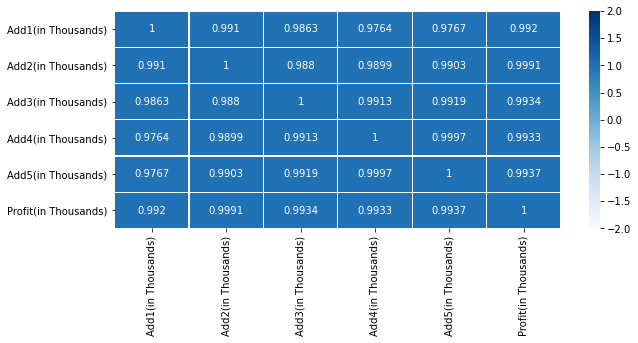

In [23]:
correlation_data = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(correlation_data,fmt='.4g',vmin=-2,vmax=2,annot=True,linewidths=0.2,cmap='Blues')

Insights:
    
   The above correlation heat map shows a strong positive correlation between the amount spent for advertising and profit generated in all the five companies

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [24]:
y= data['Profit(in Thousands)']
X= data.drop(['Date','Profit(in Thousands)'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size = 0.25)

from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

prediction_model=model.predict(X_test)

In [26]:
print(y_test)

56     4947.720
37     4480.363
67     5001.615
79     5013.207
80     5043.705
155    5078.636
182    5956.323
10     4411.775
129    5140.372
62     5234.487
65     5075.858
17     4326.782
134    4934.682
200    5374.105
148    5190.758
38     4486.380
176    5858.340
151    5146.949
93     4705.198
29     4482.183
0      4093.065
2      4213.819
143    5134.657
184    5962.336
95     4623.793
122    5167.878
189    5938.474
39     4506.279
66     5038.222
19     4193.095
11     4435.571
45     4606.340
41     4453.205
92     4763.690
171    5792.175
1      4042.448
57     5071.736
193    5745.806
172    5789.791
121    5184.204
196    5676.934
139    5300.437
156    5137.534
82     5034.726
163    5267.657
185    5903.253
174    5866.196
12     4464.110
55     4760.877
77     5187.445
22     4523.704
188    5880.541
Name: Profit(in Thousands), dtype: float64


In [27]:
print(prediction_model)

[4947.72  4480.363 5001.615 5013.207 5043.705 5078.636 5956.323 4411.775
 5140.372 5234.487 5075.858 4326.782 4934.682 5374.105 5190.758 4486.38
 5858.34  5146.949 4705.198 4482.183 4093.065 4213.819 5134.657 5962.336
 4623.793 5167.878 5938.474 4506.279 5038.222 4193.095 4435.571 4606.34
 4453.205 4763.69  5792.175 4042.448 5071.736 5745.806 5789.791 5184.204
 5676.934 5300.437 5137.534 5034.726 5267.657 5903.253 5866.196 4464.11
 4760.877 5187.445 4523.704 5880.541]


In [28]:
from sklearn.metrics import mean_squared_error

print('MSE is : ',mean_squared_error(y_test,prediction_model))

MSE is :  1.8015039302236613e-24


Insights:
    
   the mean squared error value is more than one

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [29]:
make_prediction = [[290,312,309,298,320]]
model.predict(make_prediction).item()

5820.060000000001

Insights:
    
   The prediction denotes the profit and it's more than 5820 in thousands.